In [1]:
# Useful for debugging
%load_ext autoreload
%autoreload 2

In [2]:
from distgen.generator import Generator
from distgen.plot import plot_2d, plot_1d, plot_current_profile
from matplotlib import pyplot as plt

In [4]:
gen = Generator(verbose=0) 
units = {"x":"mm","y":"mm","px":"keV/c","py":"keV/c","t":"ps","q":"pC"}

# Radial Distributions

User Input:
r_dist: {'type': 'radial_uniform', 'params': {'min_r': {'value': 1, 'units': 'mm'}, 'max_r': {'value': 2, 'units': 'mm'}}}


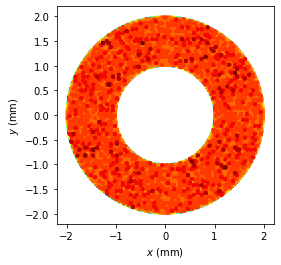

In [5]:
# Uniform radial distribution from min_r to max_r
gen=Generator('data/rad.uniform.in.json',verbose=0)

beam = gen.beam()

print("User Input:")
print("r_dist:",gen.input["r_dist"])

# X-Y Plot
plot_2d(beam,1,"x",units["x"],"y",units["y"],'scatter_hist2d',nbins=100,axis="equal");

User Input:
r_dist: {'type': 'rtg', 'params': {'pinhole_size': {'value': 2, 'units': 'mm'}, 'fraction': {'value': 0.5, 'units': 'dimensionless'}}}


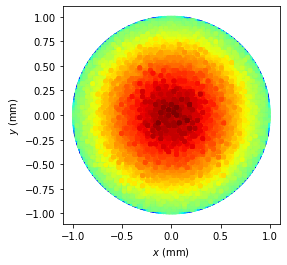

In [4]:
# Truncated radial gaussian distribution with pihole size of 2 mm, gaussian clipped at 50% intensity
gen=Generator('data/rad.trunc.gaussian.in.json',verbose=0)
beam = gen.beam()

print("User Input:")
print("r_dist:",gen.input["r_dist"])

# X-Y Plot
plot_2d(beam,1,"x",units["x"],"y",units["y"],'scatter_hist2d',nbins=75,axis="equal");

User Input:
r_dist: {'type': 'radial_gaussian', 'params': {'sigma_xy': {'value': 2, 'units': 'mm'}}}


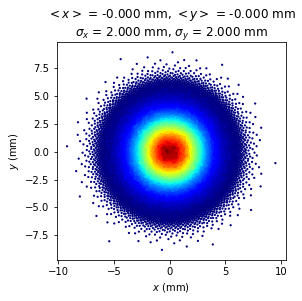

In [6]:
# Radial gaussian distribution with sigma_xy 2 mm
gen=Generator('data/rad.gaussian.in.json',verbose=0)

beam = gen.beam()

print("User Input:")
print("r_dist:",gen.input["r_dist"])

# X-Y Plot
plot_2d(beam,1,"x",units["x"],"y",units["y"],'scatter_hist2d',nbins=200,axis="equal");

User Input:
r_dist: {'type': 'radfile', 'params': {'file': 'cutgauss.rad.txt', 'units': 'mm'}}


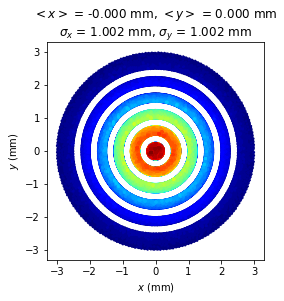

In [7]:
# Radial distribution file: a radial gaussian with cuts in it
gen=Generator('data/rad.file.in.json', verbose=0)

beam = gen.beam()

print("User Input:")
print("r_dist:",gen.input["r_dist"])

# X-Y Plot
plot_2d(beam,1,"x",units["x"],"y",units["y"],'scatter_hist2d',nbins=200,axis="equal");

User Input:
xy_dist: {'type': 'file2d', 'params': {'file': 'laser.image.txt'}}


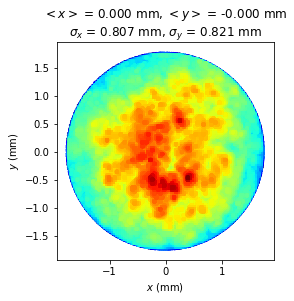

In [8]:
# 2D XY distribution: Lase Image Example
# Real laser spot image - using 1 million particles (takes a few secs)
gen=Generator('data/laser.image.in.json',verbose=0)

beam = gen.beam()

print("User Input:")
print("xy_dist:",gen.input["xy_dist"])

# X-Y Plot
plot_2d(beam,1,"x",units["x"],"y",units["y"],'scatter_hist2d',nbins=100,axis="equal");

# In the file "laser.image.txt", the first row specfies: x range avg [units], the second the same for y:
# x   3.5002000e+00   0.0000000e+00 [mm]
# y   3.5002000e+00   0.0000000e+00 [mm] 
# The rest of the data is a rectangular equally spaced grid of rho(x,y)

User Input:
r_dist: {'type': 'radial_tukey', 'params': {'length': {'value': 5, 'units': 'mm'}, 'ratio': {'value': 0.25, 'units': ''}}}


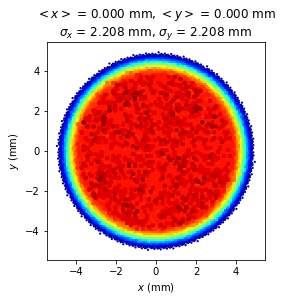

In [9]:
# Radial Tukey distribution
gen=Generator('data/tukey.beer.can.in.json',verbose=0)

beam = gen.beam()

print("User Input:")
print("r_dist:", gen.input["r_dist"])

# X-Y Plot
plot_2d(beam,1,"x",units["x"],"y",units["y"],'scatter_hist2d',nbins=100,axis="equal");

# Basic 1D Distributions: uniform, file 1D, and Gaussian 

User Input:
x_dist: {'type': 'uniform', 'params': {'min_x': {'value': -1, 'units': 'mm'}, 'max_x': {'value': 2, 'units': 'mm'}}}


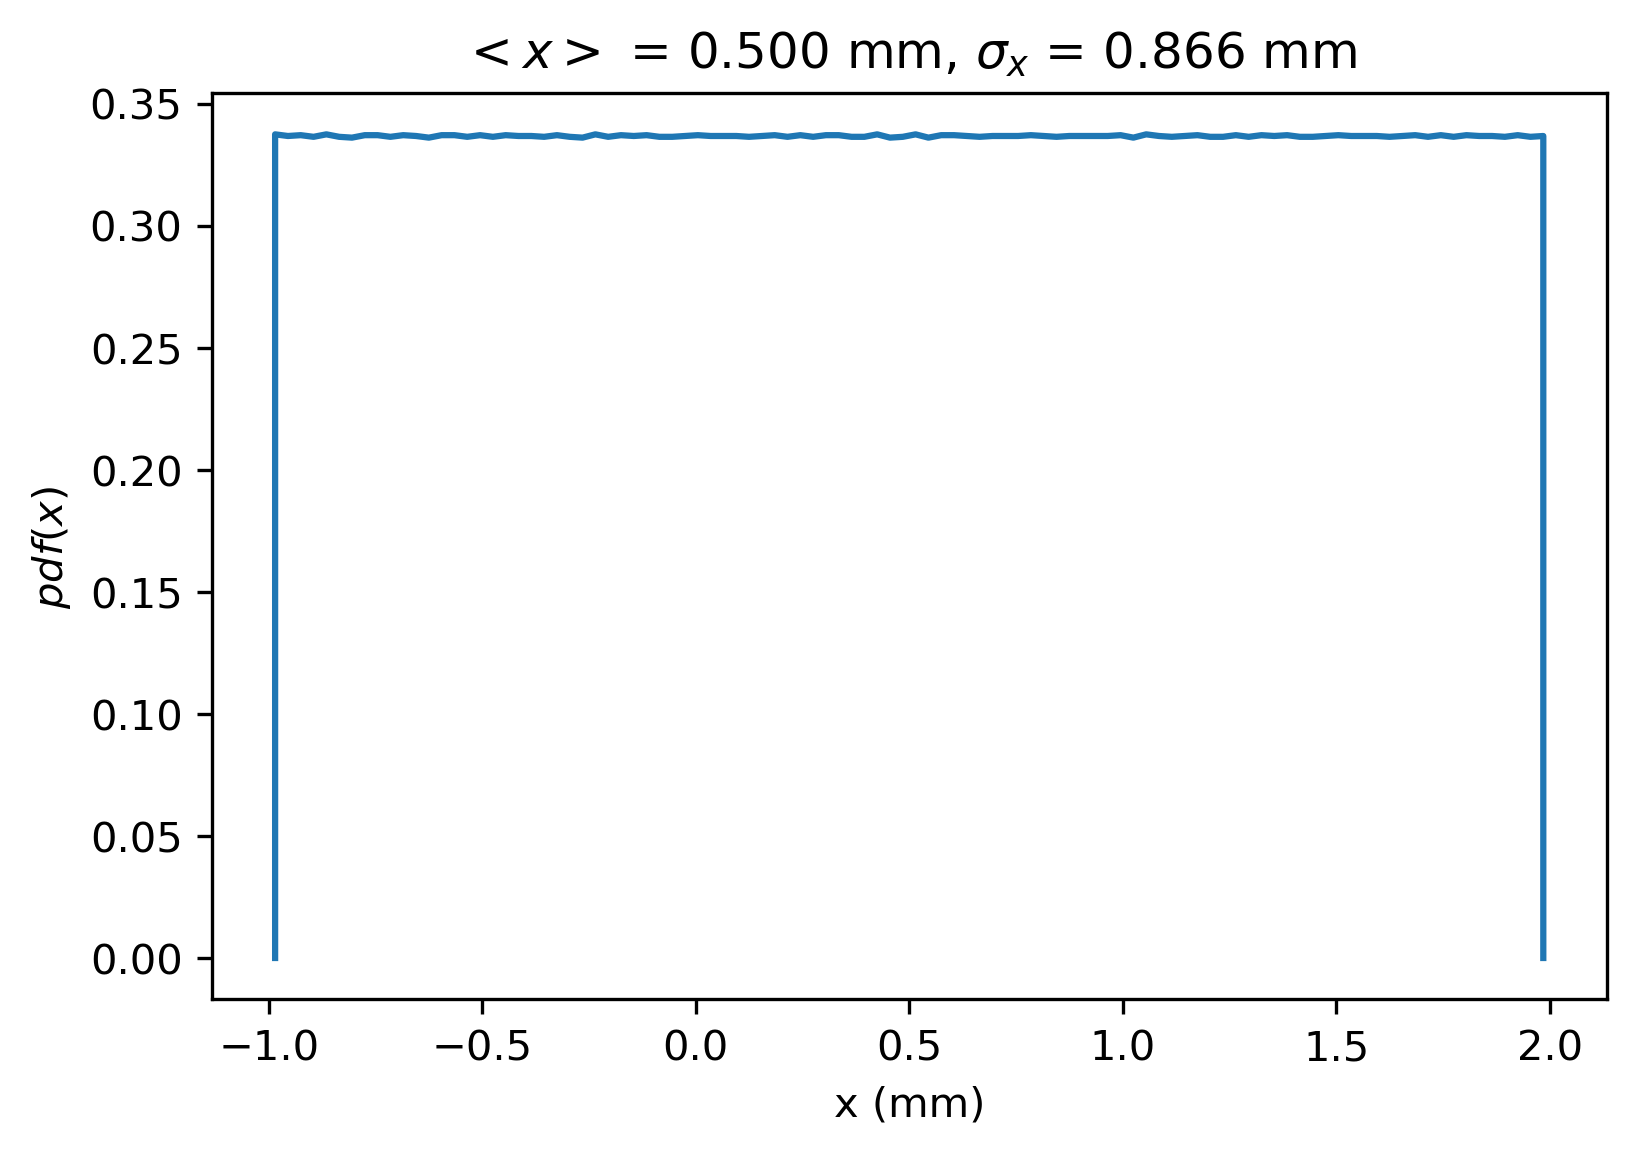

In [16]:
# Similar to plot_2d, plot_1d performs a 1D histogram of a beam coordinate

gen=Generator('data/x.uniform.y.file.t.gaussian.in.json',verbose=0)

beam = gen.beam()

print("User Input:")
print("x_dist:", gen.input["x_dist"])
plot_1d(beam,"x",units["x"],nbins=100)

User Input:
y_dist: {'type': 'file1d', 'params': {'file': '../regression_tests/cutgauss.1d.txt', 'units': 'mm'}}


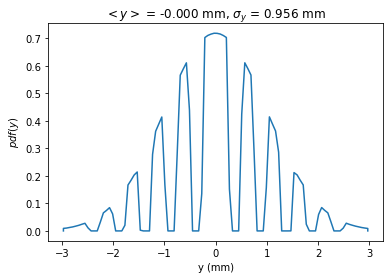

In [11]:
print("User Input:")
print("y_dist:",gen.input["y_dist"])
plot_1d(beam,"y",units["y"],nbins=50)

User Input:
t_dist: {'type': 'crystals', 'params': {'crystal_length_1': {'value': 15.096, 'units': 'mm'}, 'crystal_length_2': {'value': 7.548, 'units': 'mm'}, 'crystal_length_3': {'value': 3.774, 'units': 'mm'}, 'crystal_length_4': {'value': 1.887, 'units': 'mm'}, 'crystal_angle_1': {'value': 0.6, 'units': 'deg'}, 'crystal_angle_2': {'value': 1.8, 'units': 'deg'}, 'crystal_angle_3': {'value': -0.9, 'units': 'deg'}, 'crystal_angle_4': {'value': -0.5, 'units': 'deg'}}}


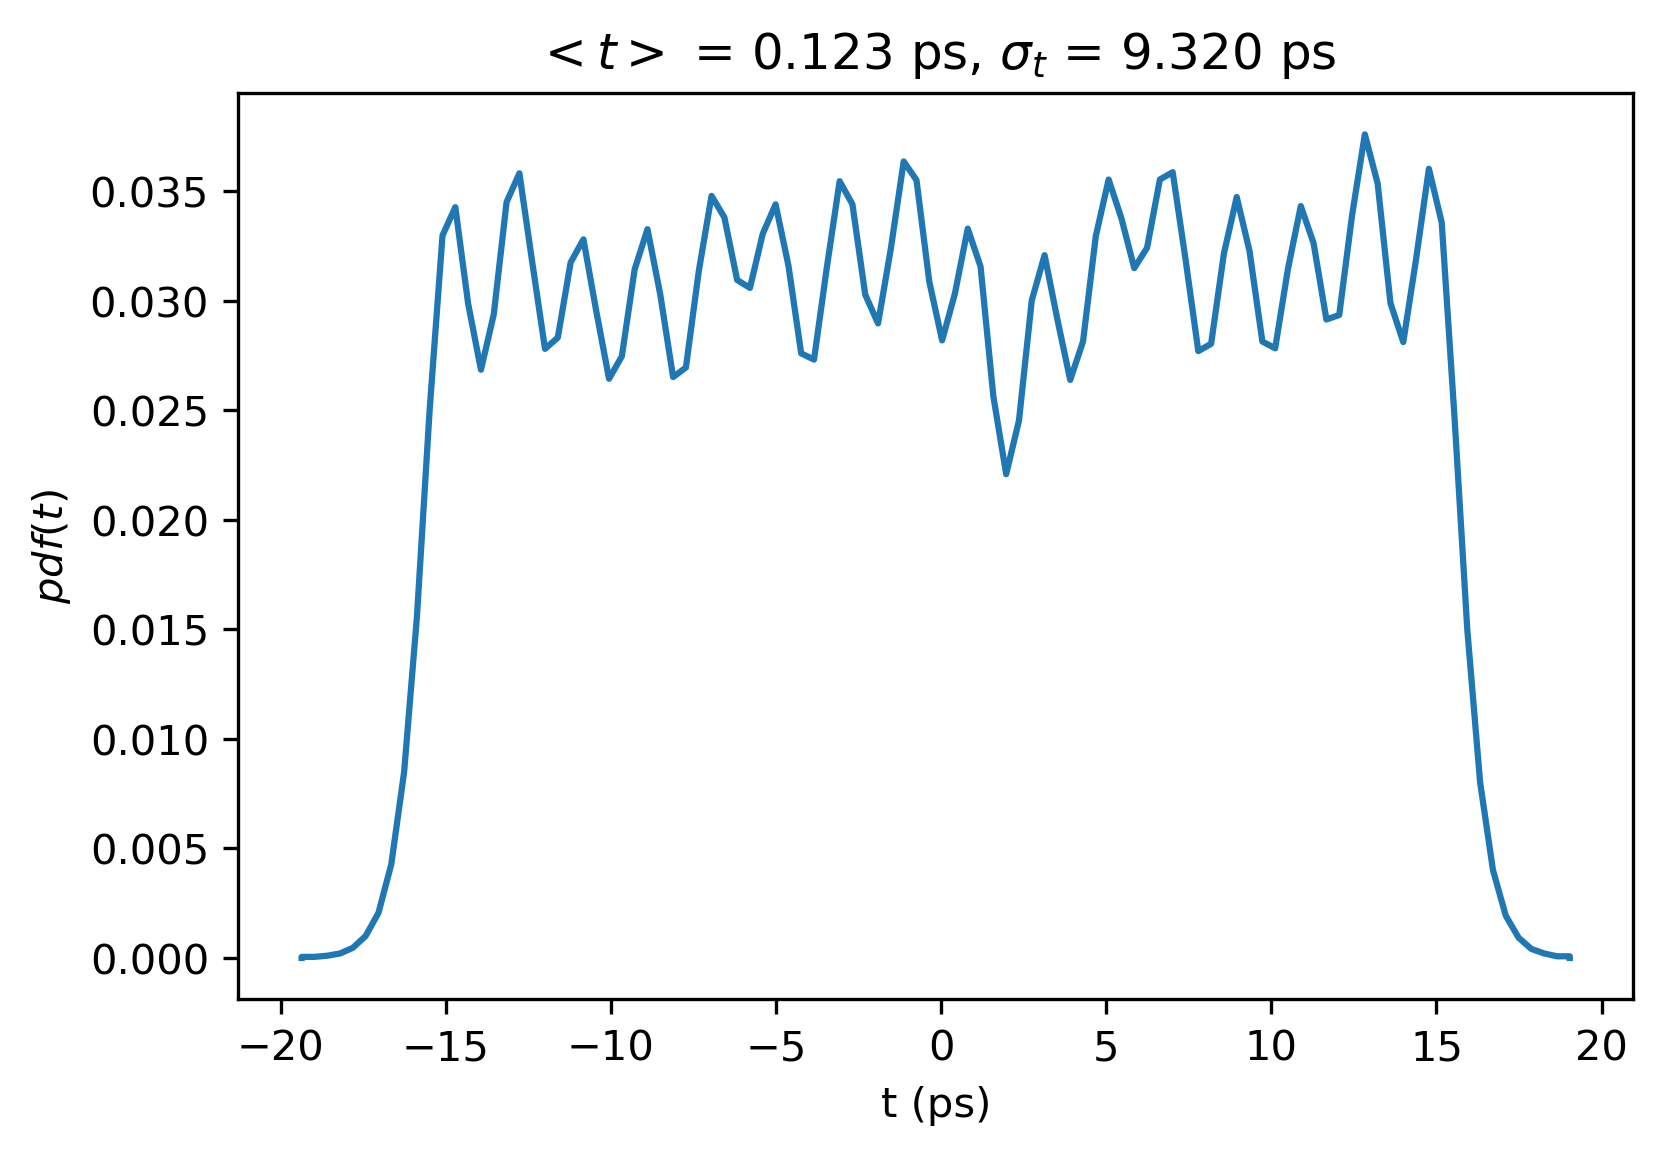

In [12]:
print("User Input:")
print("t_dist:",gen.input["t_dist"])
plot_1d(beam,"t",units["t"],nbins=100)

# Special Temporal Distributions

User Input:
t_dist: {'type': 'crystals', 'params': {'crystal_length_1': {'value': 15.096, 'units': 'mm'}, 'crystal_length_2': {'value': 7.548, 'units': 'mm'}, 'crystal_length_3': {'value': 3.774, 'units': 'mm'}, 'crystal_length_4': {'value': 1.887, 'units': 'mm'}, 'crystal_angle_1': {'value': 0.6, 'units': 'deg'}, 'crystal_angle_2': {'value': 1.8, 'units': 'deg'}, 'crystal_angle_3': {'value': -0.9, 'units': 'deg'}, 'crystal_angle_4': {'value': -0.5, 'units': 'deg'}}}


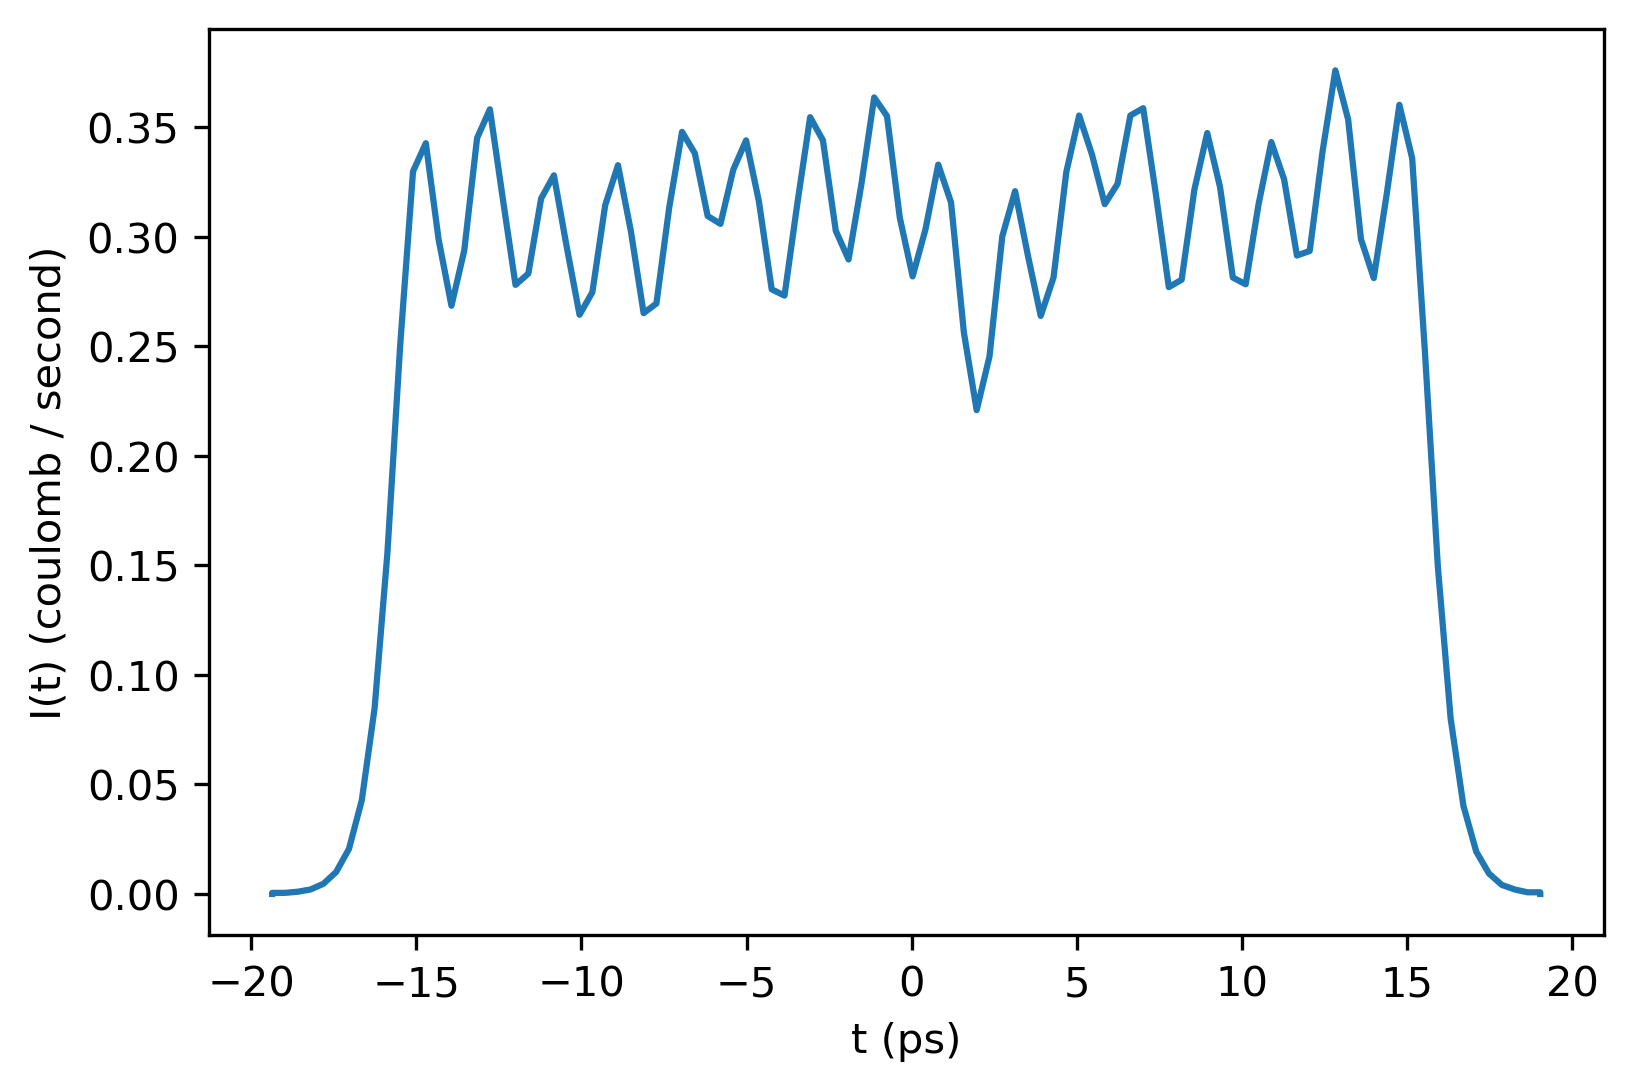

In [11]:
# Pulse stacking using birefrigent crystals
gen=Generator('data/t.crystals.in.json',verbose=0)
beam = gen.beam()
#import matplotlib as mpl
#mpl.rcParams['figure.dpi']= 300
print("User Input:")
print("t_dist:",gen.input["t_dist"])
plot_current_profile(beam,1,units)



User Input:
t_dist: {'type': 'file1d', 'params': {'file': 'tdist_file.dat', 'units': 'ps'}}


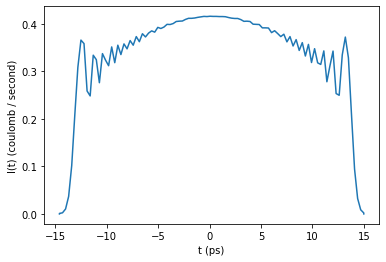

In [14]:
# PDF from file
gen=Generator('data/t.file.json', verbose=0)

beam = gen.beam()

print("User Input:")
print("t_dist:",gen.input["t_dist"])
plot_current_profile(beam,1,units)

User Input:
t_dist: {'type': 'tukey', 'params': {'length': {'value': 5.0, 'units': 'ps'}, 'ratio': {'value': 0.75, 'units': ''}}}


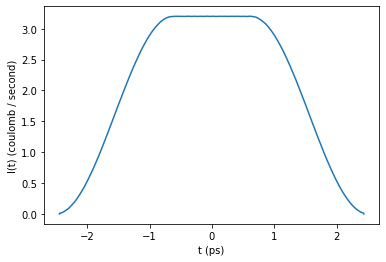

In [15]:
# Tukey distribution
gen=Generator('data/tukey.beer.can.in.json', verbose=0)

beam = gen.beam()

print("User Input:")
print("t_dist:",gen.input["t_dist"])
plot_current_profile(beam,1,units)